<h1><center>Assignment No 1</center></h1>
<h1><center>Data Understanding and Exploratory Data Analysis</center></h1>


# Guidelines
1. Rename jupyter notebook as **rollnumber_firstname_lastname_A1**.
1. You are only allowed to use pandas, numpy and seaborn libraries.
1. You are supposed to answer the question here on Jupyter notebook. Use markdown cells to answer the questions while use "Code" cells to write the code. You can double click on any markdown cell to edit it and press **shift+enter** to execute any cell.
1. Once finished, go to File menu and download the notebook as .html
1. Make sure all required figures and tables are visible in the HTML file.
1. Submit this HTML file. Note that it must follow the naming convention mentioned above.

# Import Libraries

In [1]:
# Do not modify this cell

import pandas as pd
import numpy as np
import seaborn as sns

# Import Data

In [2]:
# do not modify this cell
train_data = pd.read_csv('data/Environment_Temperature_change.csv',encoding = "ISO-8859-1")


In [3]:

train_data_backup = train_data
train_data.head()

,Area Code,Area,Months Code,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7002,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,2,Afghanistan,7003,March,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,2,Afghanistan,7004,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,2,Afghanistan,7005,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


# Part 1: Filling missing (NaN) values. (8 questions, 5 marks each)
**We have loaded a dataset for you and it's first 10 rows are printed. All below experiments are to be performed on the variable "train_data".**

1. Identify and enlist numerical and categorical attributes.
1. Print summary statistics of the numerical attributes of the data (mean, std, min, 25%, 50%, 75%, max, counts).
1. Write a code below that prints total number of records and total number of attributes of this data.
1. Show if there are any missing values. Fill the missing values using backward fill and then prove that there are no missing values left. Highlight the issues that may arise with this form of filling.
1. Print summary statistics again and comment on the difference (before and after filling missing values).

#### Print Summary statistics of numerical attribtues




In [24]:
# Print Summary statistics of numerical attribtues

onlyNumerics = train_data.drop(['Area Code', 'Area', 'Months Code', 'Months'], axis = 1)
numericsSummary = onlyNumerics.describe()
numericsSummary

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,...,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000
mean,0.139654,0.017516,-0.119657,-0.125025,-0.222729,0.109856,-0.119028,-0.196515,0.126744,0.097412,...,1.069021,0.854786,0.894655,0.986940,1.158152,1.347979,1.452094,1.284930,1.322521,1.474732
std,0.760309,0.779786,1.258086,0.883199,0.704041,0.899331,0.728258,0.741145,0.833924,0.711704,...,1.082269,0.919316,1.068699,0.865579,0.988827,0.984642,1.000857,0.959361,1.047168,0.953320
min,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,-8.407000,-6.784000,-5.847000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,-0.230250,-0.276000,-0.333000,-0.465000,-0.550250,-0.219000,-0.443000,-0.487000,-0.190000,-0.202000,...,0.602000,0.397750,0.429000,0.583000,0.631750,0.793750,0.954750,0.803750,0.721000,0.958000
50%,0.069000,-0.004500,0.010500,-0.083500,-0.246000,0.069000,-0.161000,-0.206500,0.152000,0.124000,...,1.100000,0.827000,0.842500,0.935000,0.993500,1.236500,1.388000,1.223500,1.163000,1.375000
75%,0.410000,0.350000,0.363000,0.266000,0.063250,0.431250,0.138000,0.110000,0.480000,0.459000,...,1.569250,1.260000,1.367500,1.337250,1.494250,1.764250,1.857000,1.671000,1.760250,1.885000
max,5.771000,4.366000,4.666000,5.233000,5.144000,5.771000,4.768000,4.092000,4.411000,2.999000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


**Enlist numerical and categorical attributes.**

> Numerical Attributes :

attributes Y1961 to Y2019

> Categorical Attributes: 

Area Code, Area, Months Code and Months

#### Show number of records and number of attributes of the data above


In [6]:
nRecords = train_data.shape[0]
nAttributes = train_data.shape[1]

print('There are ', nRecords, ' records and ', nAttributes, ' attributes')

There are  4828  records and  63  attributes


#### Write code to perform backward fill for all columns. Show first 10 rows. Also highlight the issues that may arise with this form of filling
Also perform a test for NAN values before and after the fill

In [11]:
train_data.bfill(inplace = True)
train_data.head(10)


,Area Code,Area,Months Code,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7002,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,2,Afghanistan,7003,March,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,2,Afghanistan,7004,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,2,Afghanistan,7005,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
5,2,Afghanistan,7006,June,-0.058,-1.061,1.164,-0.519,-0.422,1.274,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
6,2,Afghanistan,7007,July,0.884,0.292,0.348,-0.142,0.116,-0.267,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
7,2,Afghanistan,7008,August,0.391,-0.220,0.094,0.671,-0.686,0.049,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
8,2,Afghanistan,7009,September,1.445,-1.797,0.163,-0.253,-0.661,-0.403,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
9,2,Afghanistan,7010,October,-1.102,-0.968,1.654,-2.839,2.211,-0.428,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


#### Convert the following to a "Markdown" cell and answer the question 5.


The last value may not be filled as the previous values cannot be used to fill the upcoming values

#### Print summary statistics after filling missing values

In [22]:
onlyNumerics = train_data.drop(['Area Code', 'Area', 'Months Code', 'Months'], axis = 1)
numericsSummary = onlyNumerics.describe()
numericsSummary

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,...,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000
mean,0.139654,0.017516,-0.119657,-0.125025,-0.222729,0.109856,-0.119028,-0.196515,0.126744,0.097412,...,1.069021,0.854786,0.894655,0.986940,1.158152,1.347979,1.452094,1.284930,1.322521,1.474732
std,0.760309,0.779786,1.258086,0.883199,0.704041,0.899331,0.728258,0.741145,0.833924,0.711704,...,1.082269,0.919316,1.068699,0.865579,0.988827,0.984642,1.000857,0.959361,1.047168,0.953320
min,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,-8.407000,-6.784000,-5.847000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,-0.230250,-0.276000,-0.333000,-0.465000,-0.550250,-0.219000,-0.443000,-0.487000,-0.190000,-0.202000,...,0.602000,0.397750,0.429000,0.583000,0.631750,0.793750,0.954750,0.803750,0.721000,0.958000
50%,0.069000,-0.004500,0.010500,-0.083500,-0.246000,0.069000,-0.161000,-0.206500,0.152000,0.124000,...,1.100000,0.827000,0.842500,0.935000,0.993500,1.236500,1.388000,1.223500,1.163000,1.375000
75%,0.410000,0.350000,0.363000,0.266000,0.063250,0.431250,0.138000,0.110000,0.480000,0.459000,...,1.569250,1.260000,1.367500,1.337250,1.494250,1.764250,1.857000,1.671000,1.760250,1.885000
max,5.771000,4.366000,4.666000,5.233000,5.144000,5.771000,4.768000,4.092000,4.411000,2.999000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


7. Now use **train_data_backup** and fill missing values by taking mode of each column. Print summary statistics of numerical attributes and comment of the difference (between backward fill and mode fill).
8. Which method of filling missing values is desirable for this particular data and why?

#### Fill missing values of train_data_backup and print summary statistics.

In [25]:
def filling(column):
    return column.fillna(column.mode())

onlyNumericsBackup = train_data_backup.drop(['Area Code', 'Area', 'Months Code', 'Months'], axis = 1)

filled = onlyNumericsBackup.apply(filling, axis = 0)

modeSumStats = filled.describe()

modeSumStats 

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,...,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000
mean,0.139654,0.017516,-0.119657,-0.125025,-0.222729,0.109856,-0.119028,-0.196515,0.126744,0.097412,...,1.069021,0.854786,0.894655,0.986940,1.158152,1.347979,1.452094,1.284930,1.322521,1.474732
std,0.760309,0.779786,1.258086,0.883199,0.704041,0.899331,0.728258,0.741145,0.833924,0.711704,...,1.082269,0.919316,1.068699,0.865579,0.988827,0.984642,1.000857,0.959361,1.047168,0.953320
min,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,-8.407000,-6.784000,-5.847000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,-0.230250,-0.276000,-0.333000,-0.465000,-0.550250,-0.219000,-0.443000,-0.487000,-0.190000,-0.202000,...,0.602000,0.397750,0.429000,0.583000,0.631750,0.793750,0.954750,0.803750,0.721000,0.958000
50%,0.069000,-0.004500,0.010500,-0.083500,-0.246000,0.069000,-0.161000,-0.206500,0.152000,0.124000,...,1.100000,0.827000,0.842500,0.935000,0.993500,1.236500,1.388000,1.223500,1.163000,1.375000
75%,0.410000,0.350000,0.363000,0.266000,0.063250,0.431250,0.138000,0.110000,0.480000,0.459000,...,1.569250,1.260000,1.367500,1.337250,1.494250,1.764250,1.857000,1.671000,1.760250,1.885000
max,5.771000,4.366000,4.666000,5.233000,5.144000,5.771000,4.768000,4.092000,4.411000,2.999000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


#### Comment on which method is better and why.

Mode is better than backfill because when we use mode the general trend remains consistent





# Part 2: Correlation, Covariance and Heatmaps (4 questions, 5 marks each)
**In this data, you are provided gender income data. Your job is to find correlation and covariance between attributes.**

In [82]:
student_data = pd.read_csv('data/StudentsPerformance.csv')

In [83]:
student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


1. Identify "Binary Symmetric Attribute", "Numerical Continuous Attribute", "Numerical Discrete Attribute" and "Categorical Discrete Attribute".
1. Write a code to convert all categorical attributes to numerical attributes (you may use dictionary to map the values to integers).
1. Write code to calculate correlation matrix and visualize it using a heatmap. Note that if you have sucessfully converted all the attributes to numerical variables. Comment on the results. In particularly, answer the following.
 1. Does the choice of lunch makes an impact on the math score?
 1. Does race/ethnicity have an impact on the reading score?
1. Write code to calculate covariance matrix and print it. Comment on the results. What does covariance signify with respect to this dataset?


**Write down the attributes you have identified.**

**Binary Symmetric Attribute : Gender,** <br>
**Numerical Continuous Attribute : -,** <br>
**Numerical Discrete Attribute : Math, reading, and writing score,** <br>
**Categorical Discrete Attribute : race, parental level of education and lunch** <br>


#### Code to convert attributes

In [84]:
uniqueGend = student_data['gender'].unique()
print(uniqueGend)
uniqueRac = student_data['race/ethnicity'].unique()
print(uniqueRac)
uniqueEdu = student_data['parental level of education'].unique()
print(uniqueEdu)
uniqueLunc = student_data['lunch'].unique()
print(uniqueLunc)
uniqueTest = student_data['test preparation course'].unique()
print(uniqueTest)

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [85]:
catAtt = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

genderCat = []
raceCat = []
parentCat = []
lunchCat = []
testPrepCat = []

for i in catAtt:
    if i == 'gender':
        for j in range(len(student_data)):
            if student_data[i].loc[j] == 'female':
                genderCat.append(0)
            elif student_data[i].loc[j] == 'male':
                genderCat.append(1)
    if i == 'race/ethnicity':
         for j in range(len(student_data)):
            if student_data[i].loc[j] == 'group A':
                raceCat.append(0)
            elif student_data[i].loc[j] == 'group B':
                raceCat.append(1)
            elif student_data[i].loc[j] == 'group C':
                raceCat.append(2)
            elif student_data[i].loc[j] == 'group D':
                raceCat.append(3)
            elif student_data[i].loc[j] == 'group E':
                raceCat.append(4)
    if i == 'parental level of education':
        for j in range(len(student_data)):
            if student_data[i].loc[j] == "bachelor's degree":
                parentCat.append(1)
            if student_data[i].loc[j] == 'some college':
                parentCat.append(4)
            if student_data[i].loc[j] == "master's degree":
                parentCat.append(3)
            if student_data[i].loc[j] == "associate's degree":
                parentCat.append(0)
            if student_data[i].loc[j] == 'high school':
                parentCat.append(2)
            if student_data[i].loc[j] == 'some high school':
                parentCat.append(5)
    if i == 'lunch':
        for j in range(len(student_data)):
            if student_data[i].loc[j] == 'standard':
                lunchCat.append(1)
            if student_data[i].loc[j] == 'free/reduced':
                lunchCat.append(0)
    if i == 'test preparation course':
        for j in range(len(student_data)):
            if student_data[i].loc[j] == 'none':
                testPrepCat.append(1)
            if student_data[i].loc[j] == 'completed':
                testPrepCat.append(0)                             


student_data['gender'] = genderCat
student_data['race/ethnicity'] = raceCat
student_data['parental level of education'] = parentCat
student_data['lunch'] = lunchCat
student_data['test preparation course'] = testPrepCat

student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


#### Calculate correlation

In [86]:
correlation = student_data.corr()
correlation

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


#### Heatmap Sample

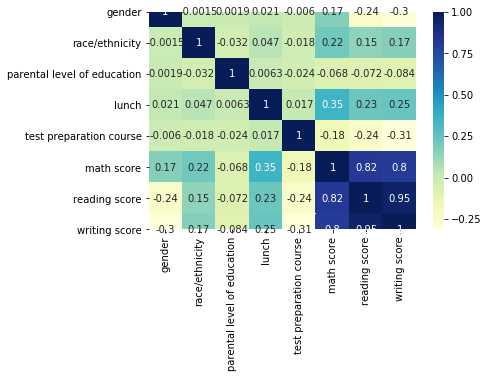

In [87]:

ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

**Comments on the Heatmap above**




Does the choice of lunch makes an impact on the math score? Yes <br>
Does race/ethnicity have an impact on the reading score? Yes

#### Caclulate covariance matrix and print it

In [88]:

student_data.cov()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,0.249926,-0.000869,0.001750,0.005115,-0.001445,1.273375,-1.783241,-2.288316
race/ethnicity,-0.000869,1.339063,-0.067632,0.025796,-0.009718,3.797311,2.454048,2.913518
parental level of education,0.001750,-0.067632,3.347151,0.005536,-0.021033,-1.894148,-1.935069,-2.343588
lunch,0.005115,0.025796,0.005536,0.229204,0.003914,2.547142,1.604600,1.787958
test preparation course,-0.001445,-0.009718,-0.021033,0.003914,0.230066,-1.292430,-1.693191,-2.280949
math score,1.273375,3.797311,-1.894148,2.547142,-1.292430,229.918998,180.998958,184.939133
reading score,-1.783241,2.454048,-1.935069,1.604600,-1.693191,180.998958,213.165605,211.786661
writing score,-2.288316,2.913518,-2.343588,1.787958,-2.280949,184.939133,211.786661,230.907992


**Comments on the Covariance**





The covariance matrix is not standardized, so we cannot say what the relationship is between two attributes

# Part 3: Chi Square Test
1. Create a contigency table for Attrition and JobSatisfaction columns.
1. Comment on the above results
1. Perform a chi square test for Attrition and JobSatisfaction columns.
1. Comment on the above results
1. Create a histogram of the YearsAtCompany Column. 
1. Comment on the above results

In [89]:
# Do not modify this
hr = pd.read_csv('data/HR.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Create a contigency table for Attrition and JobSatisfaction columns. and comment on the results in a markdown

In [101]:
data_crosstab = pd.crosstab(hr['Attrition'], 
                            hr['JobSatisfaction'],  
                               margins = False) 
print(data_crosstab)

JobSatisfaction    1    2    3    4
Attrition                          
No               223  234  369  407
Yes               66   46   73   52


The higher the job satisfaction level, the lower the attrition 

#### Perform a chi square test for Attrition and JobSatisfaction columns. And comment on the results in a markdown

In [103]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(data_crosstab)
print("P value is: ", p)

P value is:  0.0005563004510387556


p value is less than 0.05, meaning Job satisfaction and attrition are dependent on each other

#### Create a histogram of the Education Field Column. Comment on the above results in a markdown

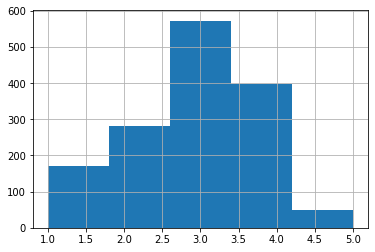

In [105]:
hr['Education'].hist(bins = 5)

This tells us that the mode of education level is 3